<p style="text-align: center; font-size">zprávu vypracovali Adam Škoda a Lukáš Dolanský</p>

# Klasifikace typů komunikace

Dle zadání byl proveden záchyt tří druhů komunikace - prohlížení webových stránek (`captures/browsing.pcapng`), přenos hudby (`captures/audio.pcapng`) a přenos videa (`captures/video.pcapng`). Každý typ komunikace byl zachytáván po dobu přibližně dvou minut. Níže vyhodnocujeme a porovnáváme parametry jednotlivých druhů komunikace dle následujících kategorií:
1. délka spojení,
2. počet přenesených bajtů,
3. počet odeslaných a přijatých paketů,
4. délky přenesených paketů.

## Zachytávaný provoz
Co se audia týče, byl zachytáván provoz online rádia Českého Rozhlasu.

V kategorii prohlížení internetu bylo navštíveno hned několik webových stránek. Zpočátku byly navštíveny stránky společnosti Oracle a její odnože Oracle Cloud. Následně byla surfována webová stránka sociální sítě Twitter. V neposlední řadě směřovalo naše přohlížení na stránky FIT ČVUT, konkrétně na Courses a GitLab. Při zachytávání komunikace jsme se snažili o pokud možno co nejdynamičtější prohlížení, tedy časté klikání a odkazy, obrázky a podobně.

Provoz v kategorii video byl tvořen přenosem 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

audio_convs_tcp = np.loadtxt("exports/audio_conversations_tcp.csv", delimiter=",", dtype=str)
audio_convs_udp = np.loadtxt("exports/audio_conversations_udp.csv", delimiter=",", dtype=str)
browsing_convs_tcp = np.loadtxt("exports/browsing_conversations_tcp.csv", delimiter=",", dtype=str)
browsing_convs_udp = np.loadtxt("exports/browsing_conversations_udp.csv", delimiter=",", dtype=str)
video_convs_tcp = np.loadtxt("exports/video_conversations_tcp.csv", delimiter=",", dtype=str)
video_convs_udp = np.loadtxt("exports/video_conversations_udp.csv", delimiter=",", dtype=str)

## Délka spojení

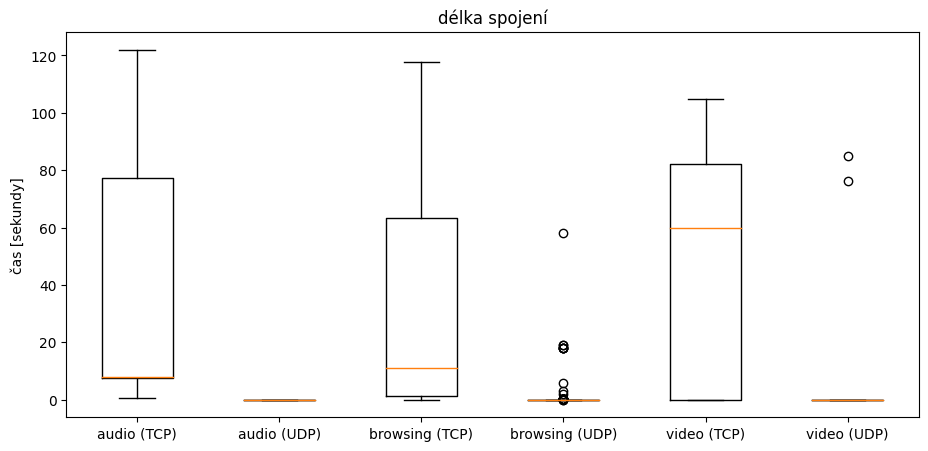

In [6]:
fig1, ax1 = plt.subplots()
data1 = [
    audio_convs_tcp[...,14].astype(np.double),
    audio_convs_udp[...,14].astype(np.double),
    browsing_convs_tcp[...,14].astype(np.double),
    browsing_convs_udp[...,14].astype(np.double),
    video_convs_tcp[...,14].astype(np.double),
    video_convs_udp[...,14].astype(np.double)
]

_ = ax1.boxplot(data1)
_ = ax1.set_title("Délka spojení")
_ = ax1.set_ylabel("čas [sekundy]")
_ = fig1.set_size_inches(11, 5)
_ = ax1.set_xticks([1, 2, 3, 4, 5, 6], [
    "audio (TCP)", "audio (UDP)", "browsing (TCP)", "browsing (UDP)", "video (TCP)", "video (UDP)"
])

Boxplot (tj. krabicový graf) v prvním grafu zachycuje statistické rozložení délek spojení v jednotlivých záchytech. Z grafu vyplývá, že délka spojení při použití protokolu TCP je zpravidla delší, než délka spojení využívající protokol UDP.

V kategoriích médií bylo vždy hlavní spojení udržováno v průběhu celého záchytu (tj. v průběhu sledování média) - v případě audio streamu (rádia) se jednalo o TCP protokol, přenos videa z youtube využíval UDP. (UDP spojení u videa končí předčasně, protože se stihlo načíst celé video "dopředu".)

Kratší TCP spojení v kategorii audio byla navazována s provozovatelem cloudové infrastruktury a online vysílání rádia.
UDP pakety v kategorii audio byly dotazy na místní DNS.
Kratší TCP spojení v kategorii video byly jednotlivé pakety vyměňované s lokálním routerem.

Co se prohlížení internetu týče, byla navazována spíše TCP spojení a to kratší délky. To se vysvětluje tím, že byly celkem prohlíženy zhruba tři webové stránky. Každá z nich přitom své zdroje pravděpodobně načítala hned z několika různých serverů. Patrných je i pár UDP spojení, z nichž nejdelší přísluší protokolu QUIC, který byl zřejmě spouštěn pro načtení embedded videa. Dílčí kratší UDP spojení přisuzujeme zejména DNS dotazům a NTP.

Překvapivé je pro nás použití TCP pro přenos streamu (zde audio) a naopak UDP pro přenos záznamu (videa). Z teoretických znalostí nabytých z přednášek jsme očekávali, že stream bude využívat UDP, aby se zajistil přenos dat v reálném čase bez zpoždění i při výpadcích spojení. Zřejmě se streamovací služba snaží zajistit kvalitní přenos zvuku za cenu případného odchýlení od živého vysílání.

## Počet přenesench bajtů

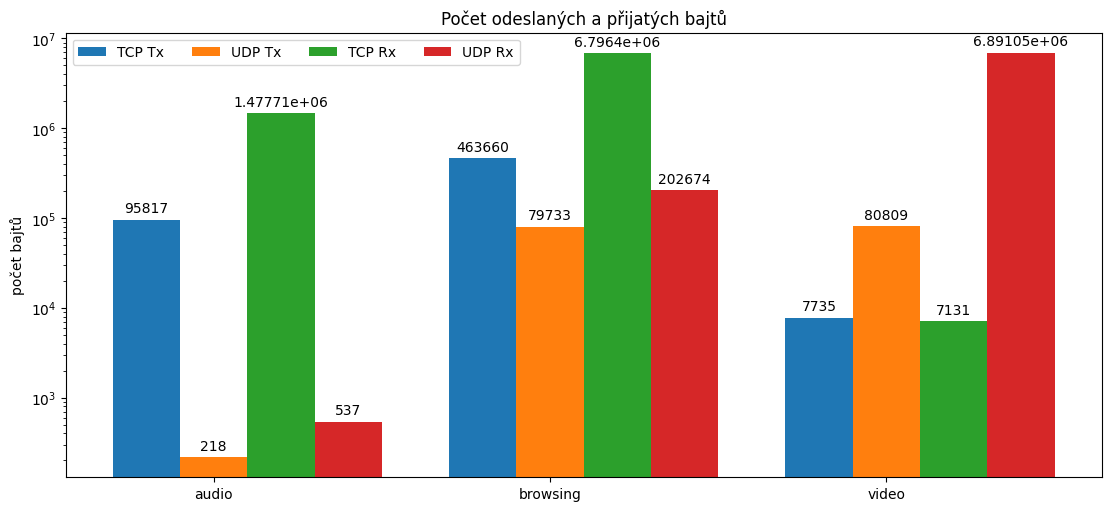

In [8]:
ipv4_mask0_tcp = audio_convs_tcp[:, 0] == '"172.16.239.210"'
ipv4_mask1_tcp = audio_convs_tcp[:, 2] == '"172.16.239.210"'
ipv6_mask0_tcp = audio_convs_tcp[:, 0] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'
ipv6_mask1_tcp = audio_convs_tcp[:, 2] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'

pckts_tx_audio_tcp = np.sum(audio_convs_tcp[ipv4_mask0_tcp][:, 10].astype(np.intc)) + np.sum(audio_convs_tcp[ipv6_mask0_tcp][:, 10].astype(np.intc)) + np.sum(audio_convs_tcp[ipv4_mask1_tcp][:, 12].astype(np.intc)) + np.sum(audio_convs_tcp[ipv6_mask1_tcp][:, 12].astype(np.intc))
pckts_rx_audio_tcp = np.sum(audio_convs_tcp[ipv4_mask0_tcp][:, 12].astype(np.intc)) + np.sum(audio_convs_tcp[ipv6_mask0_tcp][:, 12].astype(np.intc)) + np.sum(audio_convs_tcp[ipv4_mask1_tcp][:, 10].astype(np.intc)) + np.sum(audio_convs_tcp[ipv6_mask1_tcp][:, 10].astype(np.intc))

ipv4_mask0_udp = audio_convs_udp[:, 0] == '"172.16.239.210"'
ipv4_mask1_udp = audio_convs_udp[:, 2] == '"172.16.239.210"'
ipv6_mask0_udp = audio_convs_udp[:, 0] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'
ipv6_mask1_udp = audio_convs_udp[:, 2] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'

pckts_tx_audio_udp = np.sum(audio_convs_udp[ipv4_mask0_udp][:, 10].astype(np.intc)) + np.sum(audio_convs_udp[ipv6_mask0_udp][:, 10].astype(np.intc)) + np.sum(audio_convs_udp[ipv4_mask1_udp][:, 12].astype(np.intc)) + np.sum(audio_convs_udp[ipv6_mask1_udp][:, 12].astype(np.intc))
pckts_rx_audio_udp = np.sum(audio_convs_udp[ipv4_mask0_udp][:, 12].astype(np.intc)) + np.sum(audio_convs_udp[ipv6_mask0_udp][:, 12].astype(np.intc)) + np.sum(audio_convs_udp[ipv4_mask1_udp][:, 10].astype(np.intc)) + np.sum(audio_convs_udp[ipv6_mask1_udp][:, 10].astype(np.intc))

ipv4_mask0_tcp = browsing_convs_tcp[:, 0] == '"10.0.2.15"'
ipv4_mask1_tcp = browsing_convs_tcp[:, 2] == '"10.0.2.15"'
# no IPv6 communication

pckts_tx_browsing_tcp = np.sum(browsing_convs_tcp[ipv4_mask0_tcp][:, 10].astype(np.intc)) + np.sum(browsing_convs_tcp[ipv4_mask1_tcp][:, 12].astype(np.intc))
pckts_rx_browsing_tcp = np.sum(browsing_convs_tcp[ipv4_mask0_tcp][:, 12].astype(np.intc)) + np.sum(browsing_convs_tcp[ipv4_mask1_tcp][:, 10].astype(np.intc))

ipv4_mask0_udp = browsing_convs_udp[:, 0] == '"10.0.2.15"'
ipv4_mask1_udp = browsing_convs_udp[:, 2] == '"10.0.2.15"'
# no IPv6 communication

pckts_tx_browsing_udp = np.sum(browsing_convs_udp[ipv4_mask0_udp][:, 10].astype(np.intc)) + np.sum(browsing_convs_udp[ipv4_mask1_udp][:, 12].astype(np.intc))
pckts_rx_browsing_udp = np.sum(browsing_convs_udp[ipv4_mask0_udp][:, 12].astype(np.intc)) + np.sum(browsing_convs_udp[ipv4_mask1_udp][:, 10].astype(np.intc))

ipv4_mask0_tcp = video_convs_tcp[:, 0] == '"172.16.239.210"'
ipv4_mask1_tcp = video_convs_tcp[:, 2] == '"172.16.239.210"'
ipv6_mask0_tcp = video_convs_tcp[:, 0] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'
ipv6_mask1_tcp = video_convs_tcp[:, 2] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'

pckts_tx_video_tcp = np.sum(video_convs_tcp[ipv4_mask0_tcp][:, 10].astype(np.intc)) + np.sum(video_convs_tcp[ipv6_mask0_tcp][:, 10].astype(np.intc)) + np.sum(video_convs_tcp[ipv4_mask1_tcp][:, 12].astype(np.intc)) + np.sum(video_convs_tcp[ipv6_mask1_tcp][:, 12].astype(np.intc))
pckts_rx_video_tcp = np.sum(video_convs_tcp[ipv4_mask0_tcp][:, 12].astype(np.intc)) + np.sum(video_convs_tcp[ipv6_mask0_tcp][:, 12].astype(np.intc)) + np.sum(video_convs_tcp[ipv4_mask1_tcp][:, 10].astype(np.intc)) + np.sum(video_convs_tcp[ipv6_mask1_tcp][:, 10].astype(np.intc))

ipv4_mask0_udp = video_convs_udp[:, 0] == '"172.16.239.210"'
ipv4_mask1_udp = video_convs_udp[:, 2] == '"172.16.239.210"'
ipv6_mask0_udp = video_convs_udp[:, 0] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'
ipv6_mask1_udp = video_convs_udp[:, 2] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'

pckts_tx_video_udp = np.sum(video_convs_udp[ipv4_mask0_udp][:, 9].astype(np.intc)) + np.sum(video_convs_udp[ipv6_mask0_udp][:, 10].astype(np.intc)) + np.sum(video_convs_udp[ipv4_mask1_udp][:, 12].astype(np.intc)) + np.sum(video_convs_udp[ipv6_mask1_udp][:, 12].astype(np.intc))
pckts_rx_video_udp = np.sum(video_convs_udp[ipv4_mask0_udp][:, 11].astype(np.intc)) + np.sum(video_convs_udp[ipv6_mask0_udp][:, 12].astype(np.intc)) + np.sum(video_convs_udp[ipv4_mask1_udp][:, 10].astype(np.intc)) + np.sum(video_convs_udp[ipv6_mask1_udp][:, 10].astype(np.intc))

fig2, ax2 = plt.subplots(constrained_layout=True)

labels = ("audio", "browsing", "video")
data2 = {
    "TCP Tx": (pckts_tx_audio_tcp, pckts_tx_browsing_tcp, pckts_tx_video_tcp),
    "UDP Tx": (pckts_tx_audio_udp, pckts_tx_browsing_udp, pckts_tx_video_udp),
    "TCP Rx": (pckts_rx_audio_tcp, pckts_rx_browsing_tcp, pckts_rx_video_tcp),
    "UDP Rx": (pckts_rx_audio_udp, pckts_rx_browsing_udp, pckts_rx_video_udp),
}

x2 = np.arange(len(labels))
width = 0.2
mult = 0

for attr, value in data2.items():
    offset = width * mult
    rects = ax2.bar(x2 + offset, value, width, label=attr)
    ax2.bar_label(rects, padding = 3)
    mult += 1
    
_ = ax2.set_yscale('log')
_ = ax2.set_ylabel("počet bajtů")
_ = ax2.set_title("Počet odeslaných a přijatých bajtů")
_ = ax2.set_xticks(x2 + width, labels)
_ = ax2.legend(loc='upper left', ncols=4)
_ = fig2.set_size_inches(11, 5)

Graf 2 porovnává počet odeslaných a přijatých bajtů pomocí protokolů UDP a TCP napříč kategoriemi audio, browsing a video.

K největšímu (jednostrannému) přenosu dat došlo v kategorii video, kde se přenášelo nejvíce informací - zvuk a obraz, přestože ten jen v nízkém rozlišení. Odeslné pakety byly předvším reakce na UDP stream.

Audio přeneslo méně dat než video, jelikož nedocházelo k přenosu obrazu, ale pouze zvukové stopy. Odchozí TCP spojení vychází ze struktury TCP protokolu - jedná se o ACK odpovědi. UDP pakety byla komunikace s DNS serverem.

Při procházení internetových stránek docházelo k častému resolvingu doménových jmen (přenos UDP) načítání nových stránek (využívání protokolů HTTPS a TLS), tj. navazování TCP spojení - přenos dat a jejich potvrzování _ACK_, včetně načítání vložených obrázků.

Nepřekvapivě došlo k největší odchozí komunikaci při procházení internetových stránek, kdy uživatel aktivně komunikuje a navazuje nová spojení. Vzhledem k častému načítání nového obsahu, včetně obrázků, překonala celková přichozí komunikace kategorii videa.

## Počet odeslaných a přijatých paketů

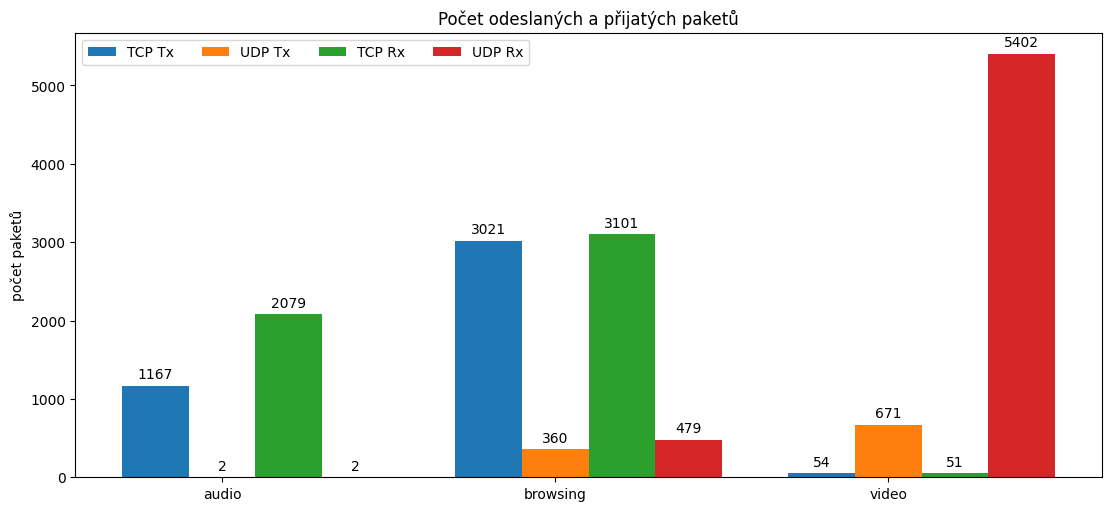

In [9]:
ipv4_mask0_tcp = audio_convs_tcp[:, 0] == '"172.16.239.210"'
ipv4_mask1_tcp = audio_convs_tcp[:, 2] == '"172.16.239.210"'
ipv6_mask0_tcp = audio_convs_tcp[:, 0] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'
ipv6_mask1_tcp = audio_convs_tcp[:, 2] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'

pckts_tx_audio_tcp = np.sum(audio_convs_tcp[ipv4_mask0_tcp][:, 9].astype(np.intc)) + np.sum(audio_convs_tcp[ipv6_mask0_tcp][:, 9].astype(np.intc)) + np.sum(audio_convs_tcp[ipv4_mask1_tcp][:, 11].astype(np.intc)) + np.sum(audio_convs_tcp[ipv6_mask1_tcp][:, 11].astype(np.intc))
pckts_rx_audio_tcp = np.sum(audio_convs_tcp[ipv4_mask0_tcp][:, 11].astype(np.intc)) + np.sum(audio_convs_tcp[ipv6_mask0_tcp][:, 11].astype(np.intc)) + np.sum(audio_convs_tcp[ipv4_mask1_tcp][:, 9].astype(np.intc)) + np.sum(audio_convs_tcp[ipv6_mask1_tcp][:, 9].astype(np.intc))

ipv4_mask0_udp = audio_convs_udp[:, 0] == '"172.16.239.210"'
ipv4_mask1_udp = audio_convs_udp[:, 2] == '"172.16.239.210"'
ipv6_mask0_udp = audio_convs_udp[:, 0] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'
ipv6_mask1_udp = audio_convs_udp[:, 2] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'

pckts_tx_audio_udp = np.sum(audio_convs_udp[ipv4_mask0_udp][:, 9].astype(np.intc)) + np.sum(audio_convs_udp[ipv6_mask0_udp][:, 9].astype(np.intc)) + np.sum(audio_convs_udp[ipv4_mask1_udp][:, 11].astype(np.intc)) + np.sum(audio_convs_udp[ipv6_mask1_udp][:, 11].astype(np.intc))
pckts_rx_audio_udp = np.sum(audio_convs_udp[ipv4_mask0_udp][:, 11].astype(np.intc)) + np.sum(audio_convs_udp[ipv6_mask0_udp][:, 11].astype(np.intc)) + np.sum(audio_convs_udp[ipv4_mask1_udp][:, 9].astype(np.intc)) + np.sum(audio_convs_udp[ipv6_mask1_udp][:, 9].astype(np.intc))

ipv4_mask0_tcp = browsing_convs_tcp[:, 0] == '"10.0.2.15"'
ipv4_mask1_tcp = browsing_convs_tcp[:, 2] == '"10.0.2.15"'
# no IPv6 communication

pckts_tx_browsing_tcp = np.sum(browsing_convs_tcp[ipv4_mask0_tcp][:, 9].astype(np.intc)) + np.sum(browsing_convs_tcp[ipv4_mask1_tcp][:, 11].astype(np.intc))
pckts_rx_browsing_tcp = np.sum(browsing_convs_tcp[ipv4_mask0_tcp][:, 11].astype(np.intc)) + np.sum(browsing_convs_tcp[ipv4_mask1_tcp][:, 9].astype(np.intc))

ipv4_mask0_udp = browsing_convs_udp[:, 0] == '"10.0.2.15"'
ipv4_mask1_udp = browsing_convs_udp[:, 2] == '"10.0.2.15"'
# no IPv6 communication

pckts_tx_browsing_udp = np.sum(browsing_convs_udp[ipv4_mask0_udp][:, 9].astype(np.intc)) + np.sum(browsing_convs_udp[ipv4_mask1_udp][:, 11].astype(np.intc))
pckts_rx_browsing_udp = np.sum(browsing_convs_udp[ipv4_mask0_udp][:, 11].astype(np.intc)) + np.sum(browsing_convs_udp[ipv4_mask1_udp][:, 9].astype(np.intc))

ipv4_mask0_tcp = video_convs_tcp[:, 0] == '"172.16.239.210"'
ipv4_mask1_tcp = video_convs_tcp[:, 2] == '"172.16.239.210"'
ipv6_mask0_tcp = video_convs_tcp[:, 0] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'
ipv6_mask1_tcp = video_convs_tcp[:, 2] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'

pckts_tx_video_tcp = np.sum(video_convs_tcp[ipv4_mask0_tcp][:, 9].astype(np.intc)) + np.sum(video_convs_tcp[ipv6_mask0_tcp][:, 9].astype(np.intc)) + np.sum(video_convs_tcp[ipv4_mask1_tcp][:, 11].astype(np.intc)) + np.sum(video_convs_tcp[ipv6_mask1_tcp][:, 11].astype(np.intc))
pckts_rx_video_tcp = np.sum(video_convs_tcp[ipv4_mask0_tcp][:, 11].astype(np.intc)) + np.sum(video_convs_tcp[ipv6_mask0_tcp][:, 11].astype(np.intc)) + np.sum(video_convs_tcp[ipv4_mask1_tcp][:, 9].astype(np.intc)) + np.sum(video_convs_tcp[ipv6_mask1_tcp][:, 9].astype(np.intc))

ipv4_mask0_udp = video_convs_udp[:, 0] == '"172.16.239.210"'
ipv4_mask1_udp = video_convs_udp[:, 2] == '"172.16.239.210"'
ipv6_mask0_udp = video_convs_udp[:, 0] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'
ipv6_mask1_udp = video_convs_udp[:, 2] == '"2001:718:2:ce:21cd:e4a:be74:86cb"'

pckts_tx_video_udp = np.sum(video_convs_udp[ipv4_mask0_udp][:, 9].astype(np.intc)) + np.sum(video_convs_udp[ipv6_mask0_udp][:, 9].astype(np.intc)) + np.sum(video_convs_udp[ipv4_mask1_udp][:, 11].astype(np.intc)) + np.sum(video_convs_udp[ipv6_mask1_udp][:, 11].astype(np.intc))
pckts_rx_video_udp = np.sum(video_convs_udp[ipv4_mask0_udp][:, 11].astype(np.intc)) + np.sum(video_convs_udp[ipv6_mask0_udp][:, 11].astype(np.intc)) + np.sum(video_convs_udp[ipv4_mask1_udp][:, 9].astype(np.intc)) + np.sum(video_convs_udp[ipv6_mask1_udp][:, 9].astype(np.intc))

fig3, ax3 = plt.subplots(constrained_layout=True)

labels = ("audio", "browsing", "video")
data3 = {
    "TCP Tx": (pckts_tx_audio_tcp, pckts_tx_browsing_tcp, pckts_tx_video_tcp),
    "UDP Tx": (pckts_tx_audio_udp, pckts_tx_browsing_udp, pckts_tx_video_udp),
    "TCP Rx": (pckts_rx_audio_tcp, pckts_rx_browsing_tcp, pckts_rx_video_tcp),
    "UDP Rx": (pckts_rx_audio_udp, pckts_rx_browsing_udp, pckts_rx_video_udp),
}

x3 = np.arange(len(labels))
width = 0.2
mult = 0

for attr, value in data3.items():
    offset = width * mult
    rects = ax3.bar(x3 + offset, value, width, label=attr)
    ax3.bar_label(rects, padding = 3)
    mult += 1
    
_ = ax3.set_ylabel("počet paketů")
_ = ax3.set_title("Počet odeslaných a přijatých paketů")
_ = ax3.set_xticks(x3 + width, labels)
_ = ax3.legend(loc='upper left', ncols=4)
_ = fig3.set_size_inches(11, 5)

Na předcházejícím sloupcovém grafu pozorujeme poměry přijatých a odeslaných paketů obsahujících TCP a UDP. Jak napovídá legenda vidíme v pořadí zleva odeslané pakety obsahující TCP a UDP a poté přijaté pakety obsahující TCP a UDP.

Poněkud nepřekvapivě v počtu přijatých paketů předehnala kategorie video obě ostatní kategorie. Je zřejmé, že jelikož video obsahuje jak obraz tak zvuk, tak je jeho přenos, alespoň co se počtu paketů týče, nejnáročnější. Zde se také projevuje naše očekávání, že streamování videa značně záleží na protokolu UDP.

V pořadí za videem se co do počtu poslaných a přijatých paketů nachází prohlížení internetu. Zde ale oproti videu vidíme mnohem vyšší využití spolehlivého protokolu TCP, což souhlasí s našimi očekáváními. Nezanedbatelná část provozu ale také probíhala pomocí protokolu UDP. To bychom mohli opět vysvětlit tím, že docházelo k načítání embedded multimédií a odesílání značného množství DNS dotazů.

Na závěr si povšimneme, že v kategorii audio byl téměř výhradně používán protokol TCP. Jak již bylo zmíněno v textu pod _Délkou spojení_, poněkud se zde rozchází naše očekávání o tom, že by měl být využit především protokol UDP, s realitou. Nicméně stejně jako u videa se v této kategorii projevuje, byť o něco nižší, disparita mezi přijatými a odeslanými pakety ve prospěch těch přijatých. To vysvětlujeme tím, že při streamování, ať už videa či audia, je nejnáročnější provoz směrem ke klientovi a zpětný provoz tak namáháný nebude, neboť je využit zejména pro potvrzování. Vychází zde 2 přijaté pakety (TCP _ACK_ + TLS) na 1 odeslaný (TCP _ACK_).

## Histogram délek paketů

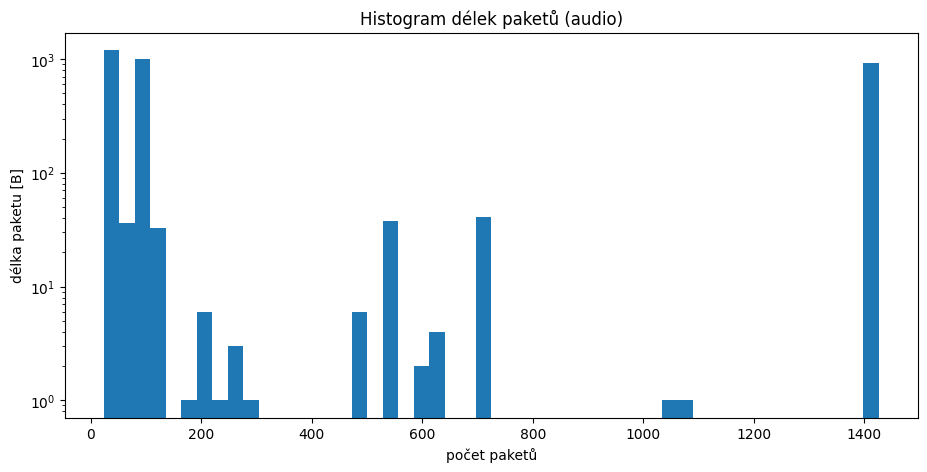

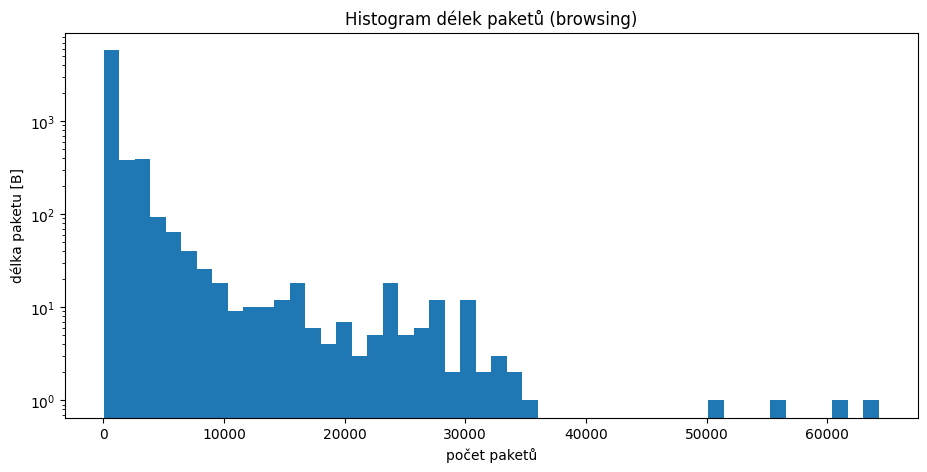

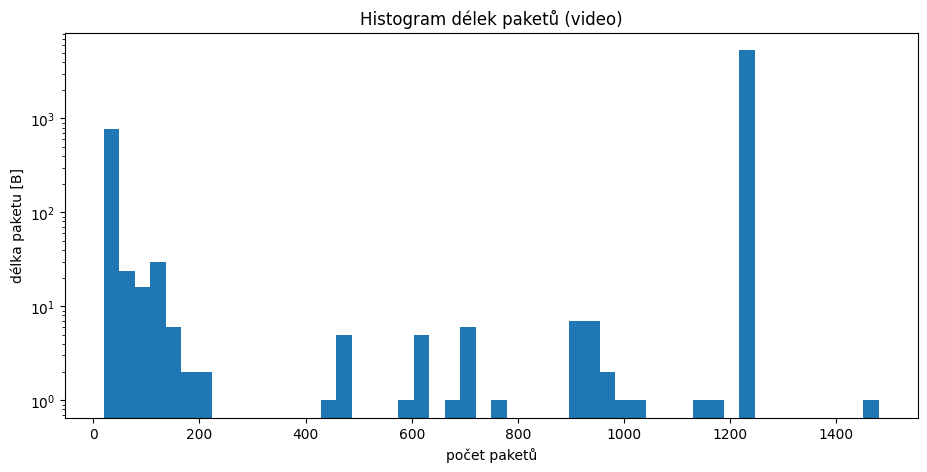

In [5]:
audio_packet_lengths = np.loadtxt("exports/audio_packet_lengths.txt", dtype=np.intc)
browsing_packet_lengths = np.loadtxt("exports/browsing_packet_lengths.txt", dtype=np.intc)
video_packet_lengths = np.loadtxt("exports/video_packet_lengths.txt", dtype=np.intc)
        
fig4, ax4 = plt.subplots()
_ = ax4.set_yscale("log")
_ = ax4.hist(audio_packet_lengths, 50)
_ = ax4.set_ylabel("délka paketu [B]")
_ = ax4.set_xlabel("počet paketů")
_ = ax4.set_title("Histogram délek paketů (audio)")
_ = fig4.set_size_inches(11, 5)

fig5, ax5 = plt.subplots()
_ = ax5.set_yscale("log")
_ = ax5.hist(browsing_packet_lengths, 50)
_ = ax5.set_ylabel("délka paketu [B]")
_ = ax5.set_xlabel("počet paketů")
_ = ax5.set_title("Histogram délek paketů (browsing)")
_ = fig5.set_size_inches(11, 5)

fig6, ax6 = plt.subplots()
_ = ax6.set_yscale("log")
_ = ax6.hist(video_packet_lengths, 50)
_ = ax6.set_ylabel("délka paketu [B]")
_ = ax6.set_xlabel("počet paketů")
_ = ax6.set_title("Histogram délek paketů (video)")
_ = fig6.set_size_inches(11, 5)

Na třech histogramech výše zobrazujeme rozložení délek paketů v každé kategorii zachytávané komunikace. Pro lepší výstup jsme opět použili logaritmické škály.

V kategorii audio vidíme, že převládaly zejména pakety o velikostech 40, 85 a 1426 B. Pakety s délkou 40 B se v komunikaci vyskytují proto, že nesou potvrzovací _ACK_ segmenty k paketům obsahujícím data. Co se paketů o velikosti 85 B týče, jednalo se o pakety obashující data protokolu TLSv1.2, který běžel nad TCP. Pakety největší velikosti - 1426 B - obsahovaly druhou (větší) část dat přenášených protokolem TLS, tedy streamovaný zvuk. Zaměříme-li se na pakety velikostí 200-400 B, zjistíme že obsahovaly zejména režijní zprávy protokolu TLS jako například _Client Hello_. Pakety o velikostech 400-1200 B přisuzujeme opět aplikačním datům protokolu TLS, tedy streamovanému zvuku.

V kategorii prohlížení internetu převládaly pakety s velikostí do 250 B. Tato komunikace sestávala zejména z _ACK_ segmentů (40 B), TCP _Keep-Alive_ segmentů a jejich potvrzení (40 B), _SYN_ segmentů (44 B), DNS dotazů a odpovědí, komunikace protokolů QUIC a TLSv1.3. Ostatní komunikace do velikosti 40000 B byla složena zejména z aplikačních dat TLSv1.3 a protokolu QUIC, případně pak dotazů a odpovědí protokolu OCSP (Online Certificate Status Protocol). Pakety největších velikostí potom obsahovaly výhradně aplikační data zabalená v protokolech TCP a TLS.

Kategorii video dominovaly zejména pakety velikosti 1238 B, které obsahovaly data protokolu UDP, jenž byl použit pro přenos videa. V závěsu potom byly pakety s velikostmi do 100 B. Tyto pakety obsahovaly hlavně data protokolu UDP, ale také _ACK_ a _Keep-Alive_ segmenty protokolu TCP (ten byl zřejmě využit pro načítání stránky jako takové) a minimum dat dalších protokolů jako DNS nebo TLSv1.2. Zbytek paketů do 400 B obsahoval hlavně _Router Advertisement_ zprávy protokolu ICMPv6, které s předmětem našeho zkoumání nemají příliš společného. Zbytek paketů, tedy pakety s velikostmi z rozsahu 400-1200 B, obsahovaly opět data protokolu UDP a místy také TLSv1.2.